In [1]:
using Flux, MLDatasets, Plots, Images, Statistics

import_train_x, import_train_y = MNIST.traindata(Float32)
import_test_x, import_test_y = MNIST.testdata(Float32)

┌ Warning: MNIST.traindata() is deprecated, use `MNIST(split=:train)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/bg0uc/src/datasets/vision/mnist.jl:187
┌ Warning: MNIST.testdata() is deprecated, use `MNIST(split=:test)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/bg0uc/src/datasets/vision/mnist.jl:195


(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

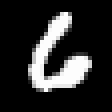

In [12]:
colorview(Gray, import_train_x[:, :, rand(1:60000)]')

In [13]:
train_x = Flux.flatten(import_train_x)
test_x = Flux.flatten(import_test_x)

784×10000 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [14]:
train_y = Flux.onehotbatch(import_train_y, 0:9)
test_y = Flux.onehotbatch(import_test_y, 0:9)

10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  …  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1     ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [15]:
function linear(in, out)
    W = randn(out, in)
    b = randn(out)
    x -> W * x .+ b
end

linear1 = linear(784, 32)
linear2 = linear(32, 32)
linear3 = linear(32, 32)
linear4 = linear(32, 10)

model(x) = σ.(linear4(σ.(linear3(σ.(linear2(σ.(linear1(x))))))))

model (generic function with 1 method)

In [16]:
function loss(x, y)
    ŷ = model(x)
    sum((y .- ŷ).^2)
end

loss (generic function with 1 method)

In [20]:
function gradient_and_update!(x, y)
    params = Flux.params(linear4.W, linear4.b, linear3.W, linear3.b, linear2.W, linear2.b, linear1.W, linear1.b)
    gs = gradient(() -> loss(x, y), params)
   
    linear1.W .-= 0.1 * gs[linear1.W]
    linear2.W .-= 0.1 * gs[linear2.W]
    linear3.W .-= 0.1 * gs[linear3.W]
    linear4.W .-= 0.1 * gs[linear4.W]
    
    linear1.b .-= gs[linear1.b]
    linear2.b .-= gs[linear2.b]
    linear3.b .-= gs[linear3.b]
    linear4.b .-= gs[linear4.b]

end

function train!(training_size)
    avg_loss = 0
    for i in 1:training_size
    
        digit = i
    
        gradient_and_update!(train_x[:, digit], train_y[:, digit])
        avg_loss += loss(train_x[:, digit], train_y[:, digit])
        if i % training_size == 0
            println("Loss: $(avg_loss / training_size)")
            avg_loss = 0
        end
    end
end

train! (generic function with 1 method)

In [21]:
function accuracy()
    correct = 0
    for i in 1:10_000
        if argmax(model(test_x[:, i])) == argmax(test_y[:, i])
            correct += 1
        end
    end
    correct / 10000
end

accuracy (generic function with 1 method)

In [45]:
avg_accuracy = 0

for i in 1:100
    
    
    linear1 = linear(784, 64)
    linear2 = linear(64, 64)
    linear3 = linear(64, 64)
    linear4 = linear(64, 10)

    model(x) = σ.(linear4(σ.(linear3(σ.(linear2(σ.(linear1(x))))))))
    train!(8000)
        
    avg_accuracy += accuracy()
end

println("Avg Accuracy = $(avg_accuracy / 100)")
    

Loss: 0.353473223426564
Loss: 0.3894148695020045
Loss: 0.6990256602019544
Loss: 0.3738703659288123
Loss: 0.37774988953759187
Loss: 0.3740886159151646
Loss: 0.3601961080330999
Loss: 0.29464512064262294
Loss: 0.40304674884361796
Loss: 0.4706583084195402
Loss: 0.35255926239473506
Loss: 0.5201073818077313
Loss: 0.4488861847988176
Loss: 2.432030815031729
Loss: 0.45687050601357493
Loss: 0.6670597659818056
Loss: 0.33406640945651495
Loss: 0.38754498349144084
Loss: 0.404536471102405
Loss: 0.5617909230578638
Loss: 0.40136324457569306
Loss: 0.39148993200456667
Loss: 0.4983723864694401
Loss: 0.3976785224141954
Loss: 0.5526759137559949
Loss: 0.7153430677492811
Loss: 0.5495473391962943
Loss: 1.256805615350329
Loss: 0.46971714925810915
Loss: 0.5148695590469102
Loss: 0.37786808380284304
Loss: 0.4170091376631146
Loss: 1.3017473494863314
Loss: 0.4212747005545532
Loss: 0.3893944714992939
Loss: 0.37200575992998774
Loss: 0.407955192079463
Loss: 0.3012745345372644
Loss: 0.34549525107698276
Loss: 0.498852293

The model predicts that the value is a 1, with a probability of 0.8230662935539642
The label is a 1


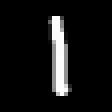

In [44]:
digit = rand(1:10000)

output = model(test_x[:, digit])
inference =  argmax(output) - 1
probability = output[inference + 1]

println("The model predicts that the value is a $(inference), with a probability of $(probability)")
println("The label is a $(argmax(test_y[:, digit]) - 1)")
colorview(Gray, import_test_x[:, :, digit]')

In [43]:
accuracy()

0.7336